In [81]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LassoCV, LogisticRegressionCV

%matplotlib inline

In [151]:
features, targets = datasets.make_classification(n_samples=400, n_features=2000, 
                                                 n_informative=5, n_repeated=6, 
                                                 n_classes=2, random_state=53)

In [152]:
rng = np.random.RandomState(seed=42)

In [153]:
resample(features, targets, random_state=rng)

[array([[-1.00584835,  0.24558426,  0.25995086, ..., -0.16066315,
          0.62857437,  0.22076345],
        [ 1.69900365,  1.94846579,  0.32743818, ...,  0.76341859,
         -1.12583646,  1.28676079],
        [ 0.2254159 , -0.25076083,  0.42239792, ..., -0.01329784,
         -0.78959779, -0.59486262],
        ...,
        [-0.36200074,  1.26685947,  0.04100829, ..., -0.16366409,
          0.90352932, -0.4216141 ],
        [ 1.17563168, -0.3935789 ,  0.34746401, ..., -0.67594113,
         -1.11210074,  0.07385036],
        [ 1.15600651,  0.39865477,  0.65169683, ..., -0.73225419,
          1.5643401 ,  1.15466601]]),
 array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
   

In [154]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=44)

In [155]:
log_reg = LogisticRegressionCV(Cs=np.logspace(-3,3, 20), cv=6, penalty='l1', solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegressionCV(Cs=array([1.00000e-03, 2.06914e-03, 4.28133e-03, 8.85867e-03, 1.83298e-02,
       3.79269e-02, 7.84760e-02, 1.62378e-01, 3.35982e-01, 6.95193e-01,
       1.43845e+00, 2.97635e+00, 6.15848e+00, 1.27427e+01, 2.63665e+01,
       5.45559e+01, 1.12884e+02, 2.33572e+02, 4.83293e+02, 1.00000e+03]),
           class_weight=None, cv=6, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l1', random_state=None, refit=True,
           scoring=None, solver='liblinear', tol=0.0001, verbose=0)

In [156]:
(log_reg.coef_  == 0).sum()

2000

In [157]:
log_reg.C_, log_reg.Cs_

(array([0.001]),
 array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
        1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
        3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
        6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
        1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]))

Okay, so we have 10 separate values of $C$ that were tried

In [158]:
log_reg.coefs_paths_[1].shape

(6, 20, 2001)

i.e. dim \#0 is the fold, dim \#1 is the $C$, and dim \#2 is the coeff

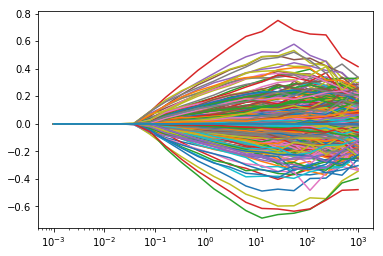

In [159]:
coef_fit = log_reg.coefs_paths_[1].mean(axis=0)
C_values = log_reg.Cs_

plt.plot(C_values, coef_fit)
plt.semilogx();

In [177]:
(log_reg.coef_ != 0).sum()

0

In [166]:
from copy import deepcopy

def bootstrap(n, model, X_train, y_train):
    new_model = deepcopy(model)
    results = []
    for _ in range(n):
        our_X, our_Y = resample(X_train, y_train, random_state=rng)
        new_model.fit(our_X, our_Y)
        results.append(new_model.coef_)
    return np.array(results)

In [167]:
bs_coef = bootstrap(200, log_reg, X_train, y_train)

In [170]:
bs_coef.shape

(200, 1, 2000)

(array([  2.,   7.,  13.,  79., 914., 881.,  73.,  21.,   8.,   2.]),
 array([-2.85706864e-01, -2.28564444e-01, -1.71422025e-01, -1.14279606e-01,
        -5.71371865e-02,  5.23275149e-06,  5.71476520e-02,  1.14290071e-01,
         1.71432491e-01,  2.28574910e-01,  2.85717329e-01]),
 <a list of 10 Patch objects>)

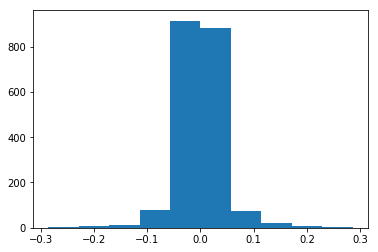

In [173]:
plt.hist(bs_coef.mean(axis=0).reshape(-1))

Automatically created module for IPython interactive environment
Computing regularization path using the LARS ...
.

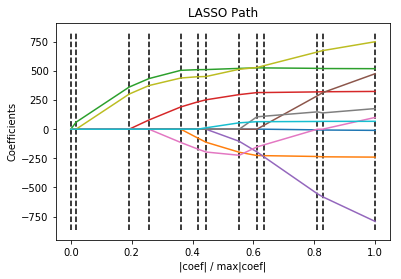

In [79]:
print(__doc__)

# Author: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#         Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

print("Computing regularization path using the LARS ...")
_, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()